In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import xarray as xr
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Todo

* Update surface mooring data with proper bins - from histogram of instrument depths -partially done
* Create common time period for correlation for all data sets
* Plot heatmap of correlation using sns heatmap

In [3]:
# load in processed daily netcdfs of each dataset

# moorings
NSI = xr.open_dataset('NSI_18_26m.nc')
CH  = xr.open_dataset('CH_100_15_24m.nc')
SYD = xr.open_dataset('SYD_140_15_26m.nc')
BMP = xr.open_dataset('BMP_120_15_24m.nc')
MIS = xr.open_dataset('MIS_15_26m.nc')

# CMC SST
NSI_cmc = xr.open_dataset('CMC_temp_SEQ200.nc')
NSI_cmc = NSI_cmc.analysed_sst - 273.15 #convert from K to C
CH_cmc = xr.open_dataset('CMC_temp_CH100.nc')
CH_cmc = CH_cmc.analysed_sst - 273.15 #convert from K to C
SRO_cmc = xr.open_dataset('SRO_CMC_anomalies_processed.nc')
SYD_cmc = xr.open_dataset('CMC_temp_SYD140.nc')
SYD_cmc = SYD_cmc.analysed_sst - 273.15 #convert from K to C
BMP_cmc = xr.open_dataset('CMC_temp_BMP.nc')
BMP_cmc = BMP_cmc.analysed_sst - 273.15 #convert from K to C
MIS_cmc = xr.open_dataset('CMC_temp_MIS.nc')
MIS_cmc = MIS_cmc.analysed_sst - 273.15 #convert from K to C

0    0.895916
dtype: float64

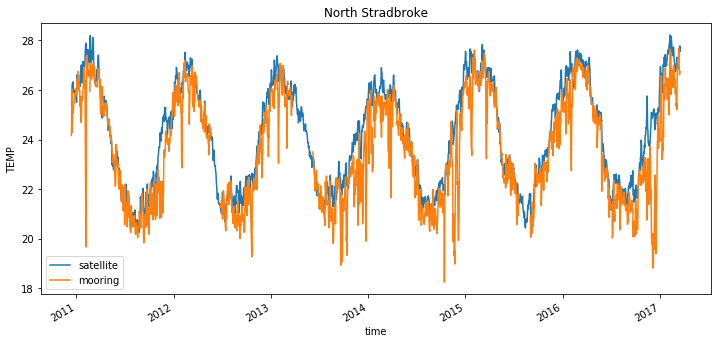

In [72]:
time_slice = dict(time=slice('2010-12-13', '2017-03-17'))

fig = plt.figure(figsize=(12,5))
NSI_cmc.sel(**time_slice).plot(label='satellite')
NSI.TEMP.sel(**time_slice).plot(label='mooring')
plt.legend()
plt.title('North Stradbroke')

# calculate correlation
df_NSI_sat = pd.DataFrame(data=NSI_cmc.sel(**time_slice))
df_NSI_moored = pd.DataFrame(data=NSI.TEMP.sel(**time_slice))
df_NSI_sat.corrwith(df_NSI_moored)


0    0.9241
dtype: float64

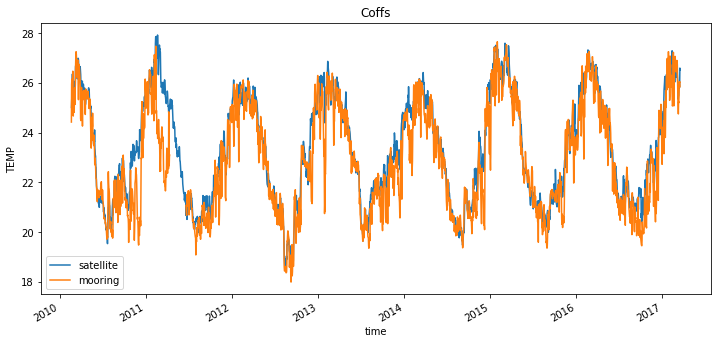

In [73]:
time_slice = dict(time=slice('2010-02-20', '2017-03-17'))

fig = plt.figure(figsize=(12,5))
CH_cmc.sel(**time_slice).plot(label='satellite')
CH.TEMP.sel(**time_slice).plot(label='mooring')
plt.legend()
plt.title('Coffs')

# calculate correlation
df_CH_sat = pd.DataFrame(data=CH_cmc.sel(**time_slice))
df_CH_moored = pd.DataFrame(data=CH.TEMP.sel(**time_slice))
df_CH_sat.corrwith(df_CH_moored)


0    0.895926
dtype: float64

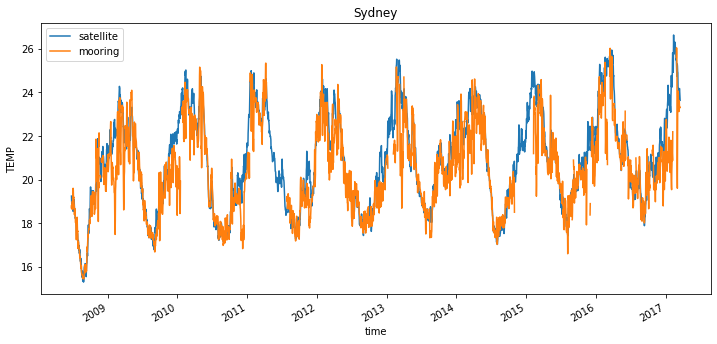

In [74]:
time_slice = dict(time=slice('2008-06-25', '2017-03-17'))

fig = plt.figure(figsize=(12,5))
SYD_cmc.sel(**time_slice).plot(label='satellite')
SYD.TEMP.sel(**time_slice).plot(label='mooring')
plt.legend()
plt.title('Sydney')

# calculate correlation
df_SYD_sat = pd.DataFrame(data=SYD_cmc.sel(**time_slice))
df_SYD_moored = pd.DataFrame(data=SYD.TEMP.sel(**time_slice))
df_SYD_sat.corrwith(df_SYD_moored)



0    0.925963
dtype: float64

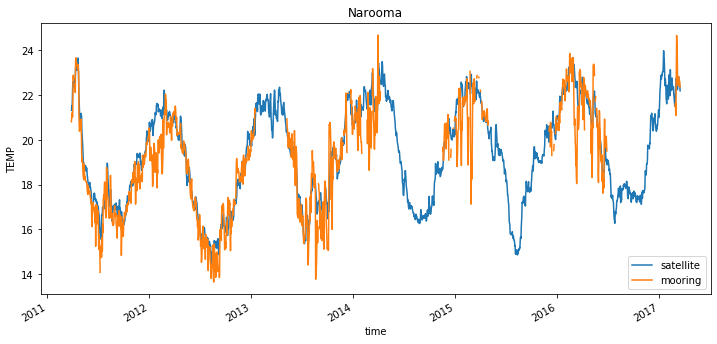

In [75]:
time_slice = dict(time=slice('2011-03-29', '2017-03-17'))

fig = plt.figure(figsize=(12,5))
BMP_cmc.sel(**time_slice).plot(label='satellite')
BMP.TEMP.sel(**time_slice).plot(label='mooring')
plt.legend()
plt.title('Narooma')

# calculate correlation
df_BMP_sat = pd.DataFrame(data=BMP_cmc.sel(**time_slice))
df_BMP_moored = pd.DataFrame(data=BMP.TEMP.sel(**time_slice))
df_BMP_sat.corrwith(df_BMP_moored)


0    0.982553
dtype: float64

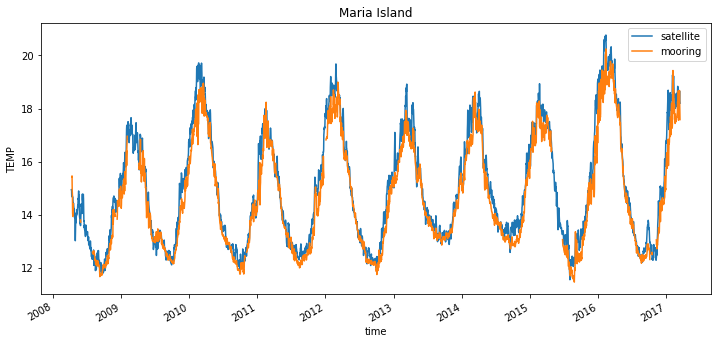

In [76]:
time_slice = dict(time=slice('2008-04-08', '2017-03-17'))

fig = plt.figure(figsize=(12,5))
MIS_cmc.sel(**time_slice).plot(label='satellite')
MIS.TEMP.sel(**time_slice).plot(label='mooring')
plt.legend()
plt.title('Maria Island')

# calculate correlation
df_MIS_sat = pd.DataFrame(data=MIS_cmc.sel(**time_slice))
df_MIS_moored = pd.DataFrame(data=MIS.TEMP.sel(**time_slice))
df_MIS_sat.corrwith(df_MIS_moored)


## get percentage coverage for each mooring

In [77]:
test = NSI.sel(**time_slice).apply(np.isnan).sum()
print('NSI percent good:' + str(100-(test.TEMP.values/NSI.TEMP.sel(**time_slice).count().values)*100))
test = CH.sel(**time_slice).apply(np.isnan).sum()
print('CH percent good:' + str(100-(test.TEMP.values/CH.TEMP.sel(**time_slice).count().values)*100))
test = SYD.sel(**time_slice).apply(np.isnan).sum()
print('SYD percent good:' + str(100-(test.TEMP.values/SYD.TEMP.sel(**time_slice).count().values)*100))
test = BMP.sel(**time_slice).apply(np.isnan).sum()
print('BMP percent good:' + str(100-(test.TEMP.values/BMP.TEMP.sel(**time_slice).count().values)*100))
test = MIS.sel(**time_slice).apply(np.isnan).sum()
print('MIS percent good:' + str(100-(test.TEMP.values/MIS.TEMP.sel(**time_slice).count().values)*100))

NSI percent good:92.62910798122066
CH percent good:97.36638264910921
SYD percent good:88.1010881010881
BMP percent good:30.140186915887853
MIS percent good:90.75995982591229
